In [108]:
import pandas as pd
import tensorflow as tf

In [109]:
daibetes=pd.read_csv("diabetes.csv")

In [110]:
daibetes.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,6,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,1,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,8,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,1,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [111]:
daibetes.columns

Index(['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree', 'Age', 'Class', 'Group'],
      dtype='object')

In [112]:
cols_to_norm = ['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree']

In [113]:
daibetes[cols_to_norm]=daibetes[cols_to_norm].apply(lambda x: (x - x.min())/(x.max()-x.min()))

In [114]:
daibetes.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [115]:

num_preg = tf.feature_column.numeric_column('Number_pregnant')
plasma_gluc = tf.feature_column.numeric_column('Glucose_concentration')
dias_press = tf.feature_column.numeric_column('Blood_pressure')
tricep = tf.feature_column.numeric_column('Triceps')
insulin = tf.feature_column.numeric_column('Insulin')
bmi = tf.feature_column.numeric_column('BMI')
diabetes_pedigree = tf.feature_column.numeric_column('Pedigree')
age = tf.feature_column.numeric_column('Age')

In [116]:
assigned_group = tf.feature_column.categorical_column_with_vocabulary_list('Group',['A','B','C','D'])

In [117]:
#assigned_group = tf.feature_column.categorical_column_with_hash_bucket('Group',hash_bucket_size=10)

In [118]:
import matplotlib.pyplot as plt

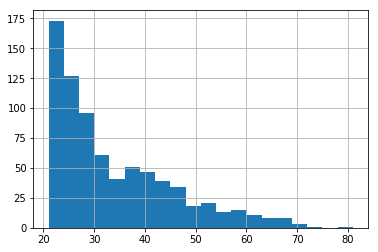

In [119]:
daibetes['Age'].hist(bins=20)

In [120]:

age_bucket = tf.feature_column.bucketized_column(age,boundaries=[20,30,40,50,60,70,80])

In [121]:
feat_cols = [num_preg,plasma_gluc,dias_press,tricep,insulin,bmi,diabetes_pedigree,assigned_group,age_bucket]

In [122]:

x_data = daibetes.drop('Class', axis=1) 
x_data.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Group
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,B
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,C
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,B
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,B
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,C


In [123]:
labels = daibetes['Class']
labels.head()

0    1
1    0
2    1
3    0
4    1
Name: Class, dtype: int64

In [124]:
from sklearn.model_selection import train_test_split

In [125]:
X_train, X_test, y_train, y_test = train_test_split(x_data,labels,test_size=0.33, random_state=101)


In [126]:
X_train.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Group
218,0.294118,0.427136,0.606557,0.222222,0.00000,0.432191,0.489325,32,A
83,0.000000,0.507538,0.532787,0.282828,0.00000,0.366617,0.067891,22,A
176,0.352941,0.427136,0.639344,0.000000,0.00000,0.464978,0.129804,42,B
53,0.470588,0.884422,0.737705,0.343434,0.35461,0.502235,0.166097,58,C
117,0.294118,0.391960,0.393443,0.000000,0.00000,0.502235,0.245944,25,D


In [127]:
input_func = tf.estimator.inputs.pandas_input_fn(x=X_train,y=y_train, batch_size=10,num_epochs=1000,shuffle=True)

In [128]:
model = tf.estimator.LinearClassifier(feature_columns=feat_cols, n_classes=2)

W0818 22:58:05.759593  1120 estimator.py:1811] Using temporary folder as model directory: C:\Users\Ashish\AppData\Local\Temp\tmp93fx857u


In [129]:
model.train(input_fn=input_func, steps=1000)

In [130]:
#Eval the model
eval_input_func = tf.estimator.inputs.pandas_input_fn(x=X_test,y=y_test,batch_size=10,num_epochs=1,
                                                      shuffle=False)

In [131]:
results = model.evaluate(eval_input_func)


W0818 22:58:19.171543  1120 metrics_impl.py:804] Trapezoidal rule is known to produce incorrect PR-AUCs; please switch to "careful_interpolation" instead.
W0818 22:58:19.227611  1120 metrics_impl.py:804] Trapezoidal rule is known to produce incorrect PR-AUCs; please switch to "careful_interpolation" instead.


In [132]:
results

{'accuracy': 0.72834647,
 'accuracy_baseline': 0.65748036,
 'auc': 0.7807833,
 'auc_precision_recall': 0.613018,
 'average_loss': 0.5353447,
 'global_step': 1000,
 'label/mean': 0.34251967,
 'loss': 5.229906,
 'precision': 0.6184211,
 'prediction/mean': 0.36038902,
 'recall': 0.54022986}

In [133]:
pred_input_func = tf.estimator.inputs.pandas_input_fn(x=X_test,batch_size=10,num_epochs=1,shuffle=False)

In [134]:
predictions = model.predict(pred_input_func)


In [135]:
my_pred = list(predictions)
my_pred

[{'all_class_ids': array([0, 1]),
  'all_classes': array([b'0', b'1'], dtype=object),
  'class_ids': array([1], dtype=int64),
  'classes': array([b'1'], dtype=object),
  'logistic': array([0.5352172], dtype=float32),
  'logits': array([0.14110267], dtype=float32),
  'probabilities': array([0.46478277, 0.5352173 ], dtype=float32)},
 {'all_class_ids': array([0, 1]),
  'all_classes': array([b'0', b'1'], dtype=object),
  'class_ids': array([1], dtype=int64),
  'classes': array([b'1'], dtype=object),
  'logistic': array([0.59773916], dtype=float32),
  'logits': array([0.3960538], dtype=float32),
  'probabilities': array([0.4022608 , 0.59773916], dtype=float32)},
 {'all_class_ids': array([0, 1]),
  'all_classes': array([b'0', b'1'], dtype=object),
  'class_ids': array([0], dtype=int64),
  'classes': array([b'0'], dtype=object),
  'logistic': array([0.3879366], dtype=float32),
  'logits': array([-0.45599395], dtype=float32),
  'probabilities': array([0.6120634, 0.3879366], dtype=float32)},
 {

In [136]:
#prediction by using DNN Classifier
dnn_model=tf.estimator.DNNClassifier(hidden_units=[10,10,10],feature_columns=feat_cols,n_classes=2)

W0818 22:58:23.266106  1120 estimator.py:1811] Using temporary folder as model directory: C:\Users\Ashish\AppData\Local\Temp\tmpvywvszhe


In [140]:
dnn_model.train(input_fn=input_func,steps=1000)

ValueError: Items of feature_columns must be a <class 'tensorflow.python.feature_column.feature_column_v2.DenseColumn'>. You can wrap a categorical column with an embedding_column or indicator_column. Given: VocabularyListCategoricalColumn(key='Group', vocabulary_list=('A', 'B', 'C', 'D'), dtype=tf.string, default_value=-1, num_oov_buckets=0)

In [138]:
embeddes_group_col=tf.feature_column.embedding_column(assigned_group,dimension=4)

In [139]:
feat_cols = [num_preg,plasma_gluc,dias_press,tricep,insulin,bmi,diabetes_pedigree,embeddes_group_col,age_bucket]

In [146]:
inpu_func=tf.estimator.inputs.pandas_input_fn(X_train,y_train,batch_size=10,num_epochs=1000,shuffle=True)

In [175]:
dnn_model=tf.estimator.DNNClassifier(hidden_units=[10,10,10],feature_columns=feat_cols,n_classes=2)

W0818 23:16:52.223795  1120 estimator.py:1811] Using temporary folder as model directory: C:\Users\Ashish\AppData\Local\Temp\tmpj4iqihdy


In [176]:
dnn_model.train(input_fn=inpu_func,steps=1000)

In [177]:
dnn_model

In [178]:
eval_input_func=tf.estimator.inputs.pandas_input_fn(x=X_test,y=y_test,batch_size=10,num_epochs=1,shuffle=False)

In [179]:
dnn_model.evaluate(eval_input_func)

W0818 23:17:06.693907  1120 metrics_impl.py:804] Trapezoidal rule is known to produce incorrect PR-AUCs; please switch to "careful_interpolation" instead.
W0818 23:17:06.733430  1120 metrics_impl.py:804] Trapezoidal rule is known to produce incorrect PR-AUCs; please switch to "careful_interpolation" instead.


{'accuracy': 0.7519685,
 'accuracy_baseline': 0.65748036,
 'auc': 0.8196366,
 'auc_precision_recall': 0.66352546,
 'average_loss': 0.5029065,
 'global_step': 1000,
 'label/mean': 0.34251967,
 'loss': 4.91301,
 'precision': 0.622449,
 'prediction/mean': 0.38778612,
 'recall': 0.7011494}